In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image, ImageOps
import cv2
import numpy as np

original_image = Image.open('/content/drive/MyDrive/Colab Notebooks/Passport_img.jpg')

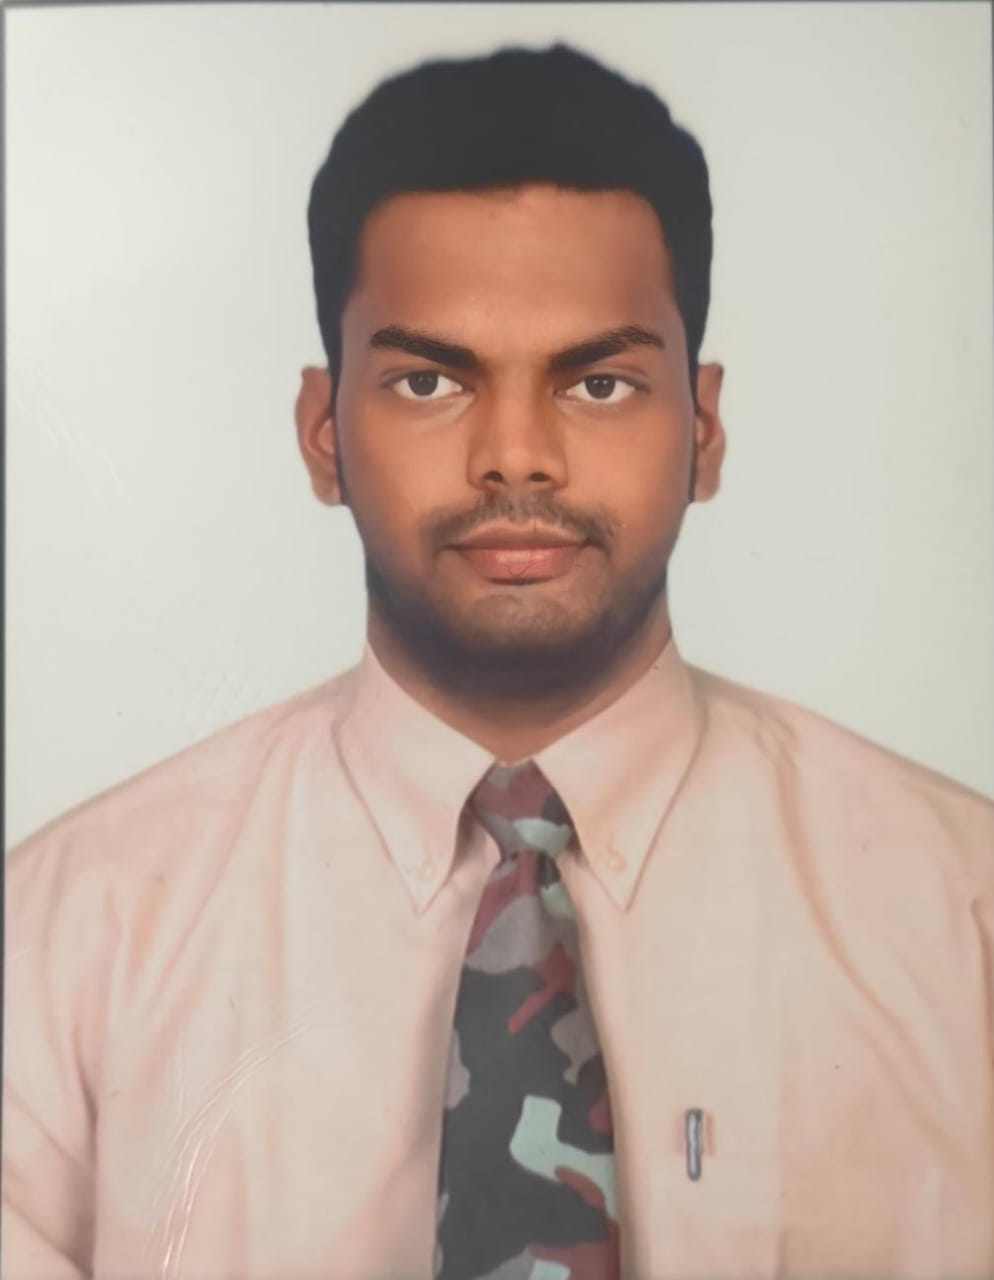

In [ ]:
original_image

In [ ]:
resized_image = original_image.resize((300, 300))

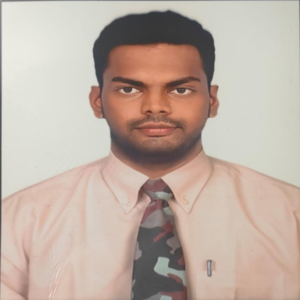

In [ ]:
resized_image.save('OriginalImage.jpg')
resized_image

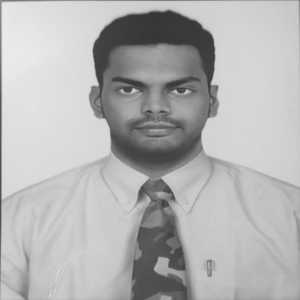

In [ ]:
grayscale_image = ImageOps.grayscale(resized_image)
grayscale_image

array([[151, 135, 130, ..., 162, 154, 117],
       [140, 149, 154, ..., 194, 186, 131],
       [137, 173, 204, ..., 196, 188, 134],
       ...,
       [181, 197, 198, ..., 161, 154, 149],
       [179, 195, 196, ..., 157, 151, 146],
       [176, 191, 193, ..., 152, 146, 141]], dtype=uint8)
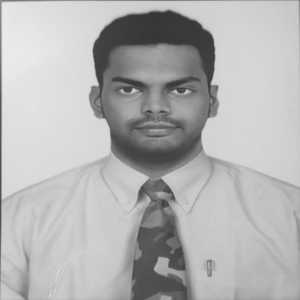

In [ ]:
grayscale_array = np.array(grayscale_image)
grayscale_array

array([[146, 148, 150, ..., 177, 165, 157],
       [150, 154, 162, ..., 181, 169, 161],
       [159, 168, 185, ..., 188, 175, 167],
       ...,
       [190, 193, 197, ..., 159, 155, 153],
       [189, 191, 195, ..., 156, 152, 150],
       [188, 190, 194, ..., 154, 150, 148]], dtype=uint8)
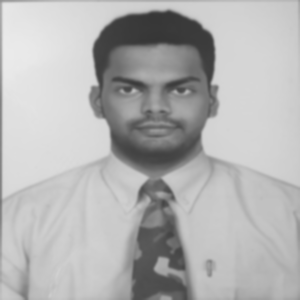

In [ ]:
blurred_image = cv2.GaussianBlur(grayscale_array, (5, 5), 0)
blurred_image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
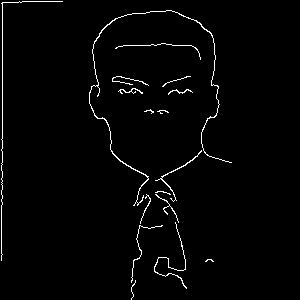

In [ ]:
edges = cv2.Canny(blurred_image, 100, 200)
edges

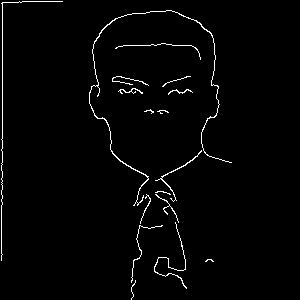

In [ ]:
edges_image = Image.fromarray(edges)


edges_image.save('processed_image.jpg')
edges_image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Passport_img.jpg')

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
normalized_image = gray_image / 255.0

In [ ]:
equalized_image = cv2.equalizeHist((normalized_image * 255).astype(np.uint8))

normalized_equalized_image = equalized_image / 255.0


plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

(-0.5, 993.5, 1279.5, -0.5)

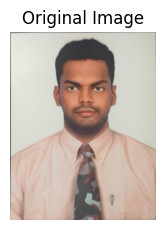

In [ ]:
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 993.5, 1279.5, -0.5)

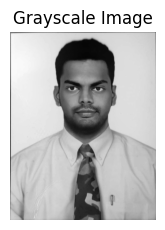

In [ ]:
plt.subplot(1, 3, 2)
plt.title("Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

(-0.5, 993.5, 1279.5, -0.5)

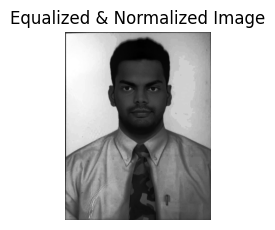

In [ ]:
plt.subplot(1, 3, 3)
plt.title("Equalized & Normalized Image")
plt.imshow(normalized_equalized_image, cmap='gray')
plt.axis('off')

In [ ]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


image = cv2.imread('/content/OriginalImage.jpg')

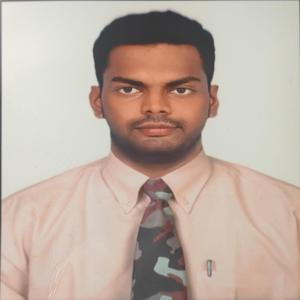

In [ ]:
cv2_imshow(image)

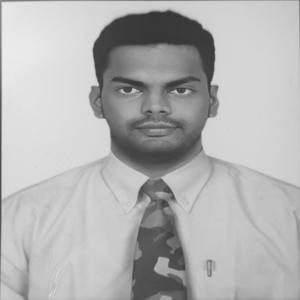

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

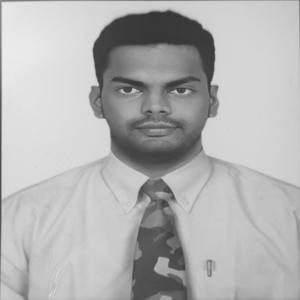

In [ ]:
normalized_image = gray_image / 255.0
cv2_imshow((normalized_image * 255).astype(np.uint8))

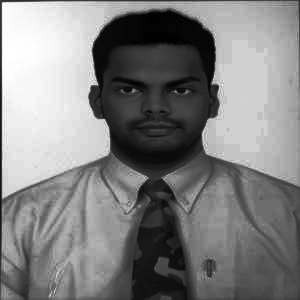

In [ ]:
equalized_image = cv2.equalizeHist(gray_image)
cv2_imshow(equalized_image)

In [ ]:
blurred_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)
blurred_gray_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

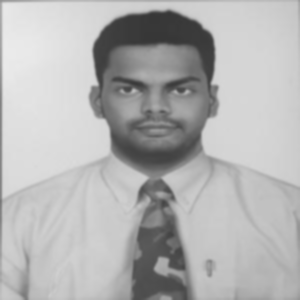

In [ ]:
cv2_imshow(blurred_gray_image)

In [ ]:

median_blurred_image = cv2.medianBlur(gray_image, 5)

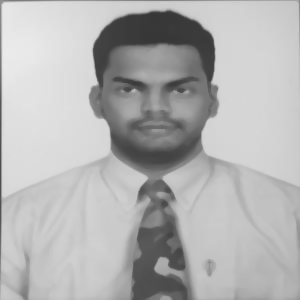

In [ ]:
cv2_imshow(median_blurred_image)

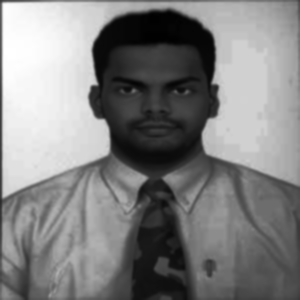

In [ ]:
blurred_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)
cv2_imshow(blurred_image)

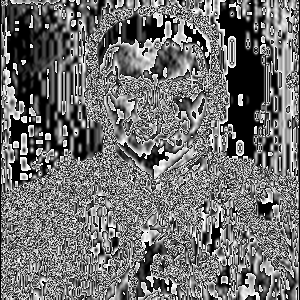

In [ ]:
edges = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
cv2_imshow((edges * 255).astype(np.uint8))

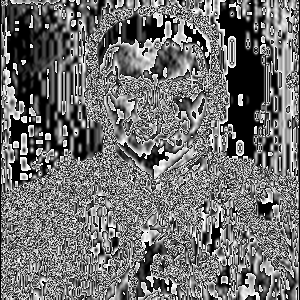

In [ ]:
processed_image = (edges * 255).astype(np.uint8)
cv2_imshow( processed_image)

In [ ]:
xray_image = cv2.imread('/content/OriginalImage.jpg', cv2.IMREAD_GRAYSCALE)


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_xray = clahe.apply(xray_image)


laplacian = cv2.Laplacian(equalized_xray, cv2.CV_64F, ksize=5)



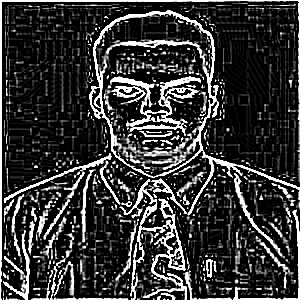

In [ ]:
cv2_imshow(laplacian)

#Morphological Operations

In [ ]:
# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)




array([[38, 38, 38, ..., 29, 29, 27],
       [38, 38, 38, ..., 29, 29, 27],
       [38, 38, 38, ..., 29, 29, 27],
       ...,
       [56, 56, 56, ..., 63, 63, 63],
       [56, 56, 56, ..., 63, 63, 63],
       [56, 56, 56, ..., 63, 63, 63]], dtype=uint8)
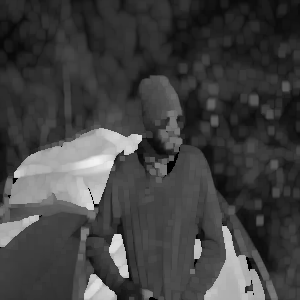

In [ ]:
# Dilation
dilated_image = cv2.dilate(gray_image, kernel, iterations=1)
dilated_image

array([[31, 31, 31, ..., 10, 10, 10],
       [31, 31, 31, ..., 10, 10, 10],
       [30, 30, 30, ..., 10, 10, 10],
       ...,
       [54, 54, 54, ..., 39, 39, 42],
       [55, 54, 54, ..., 42, 46, 47],
       [55, 54, 54, ..., 46, 47, 47]], dtype=uint8)
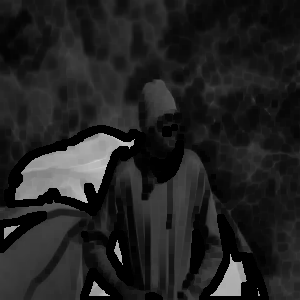

In [ ]:
eroded_image = cv2.erode(gray_image, kernel, iterations=1)
eroded_image

array([[31, 33, 35, ..., 15, 12, 10],
       [31, 33, 35, ..., 15, 12, 10],
       [31, 33, 35, ..., 15, 12, 10],
       ...,
       [55, 55, 55, ..., 47, 47, 47],
       [55, 55, 55, ..., 47, 47, 47],
       [55, 55, 55, ..., 47, 47, 47]], dtype=uint8)
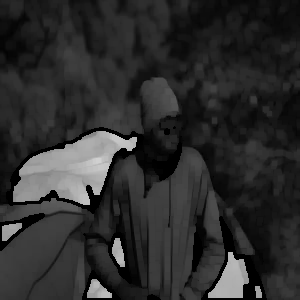

In [ ]:
opened_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)
opened_image

array([[38, 38, 38, ..., 27, 27, 27],
       [37, 37, 37, ..., 20, 20, 20],
       [35, 35, 35, ..., 15, 15, 15],
       ...,
       [56, 56, 55, ..., 54, 54, 62],
       [56, 56, 55, ..., 55, 55, 62],
       [56, 56, 55, ..., 57, 57, 63]], dtype=uint8)
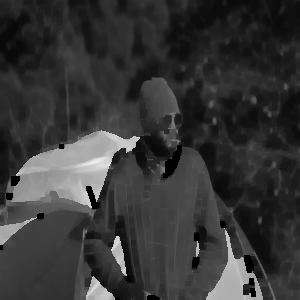

In [ ]:
closed_image = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, kernel)
closed_image

#Thresholding


array([[  0, 255, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0, 255, 255],
       [255, 255, 255, ...,   0, 255, 255],
       [255, 255, 255, ...,   0, 255, 255]], dtype=uint8)
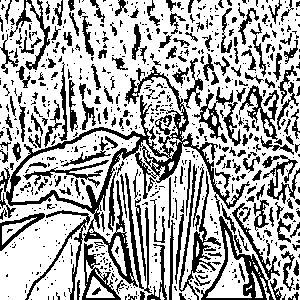

In [ ]:
# Simple Thresholding
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_thresh_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_thresh_image

#Contour Detection

array([[31, 35, 38, ..., 27, 24, 20],
       [31, 34, 37, ..., 20, 17, 14],
       [31, 33, 35, ..., 15, 12, 10],
       ...,
       [56, 56, 55, ..., 47, 53, 61],
       [56, 56, 55, ..., 48, 54, 62],
       [56, 56, 55, ..., 49, 55, 63]], dtype=uint8)
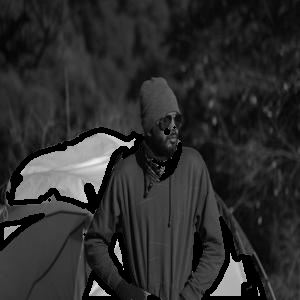

In [ ]:
# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the image
contour_image = cv2.drawContours(gray_image, contours, -1, (0, 255, 0), 2)
contour_image

#Rescaling and Resizing

array([[31, 35, 38, ..., 27, 24, 20],
       [31, 34, 36, ..., 19, 16, 13],
       [32, 33, 34, ..., 15, 13, 10],
       ...,
       [56, 56, 54, ..., 47, 51, 60],
       [56, 56, 55, ..., 48, 52, 61],
       [56, 56, 54, ..., 48, 53, 62]], dtype=uint8)
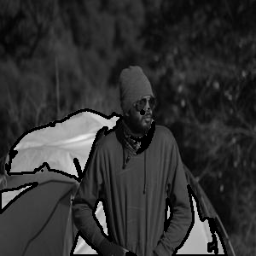

In [ ]:
# Resize image
resized_image = cv2.resize(gray_image, (256, 256))  # Resize to 256x256 pixels
resized_image

Image Registration

In [ ]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 14.7 MB/s eta 0:00:00


Filtering

Feature Extraction

In [ ]:
from skimage.feature import canny

# Edge detection using Canny
edges_canny = canny(gray_image)


Segmentation

Object Detection and Classification

X-ray Image Processing